# Session 6 - Optimal higher-order models

**Ingo Scholtes**  
Chair of Machine Learning for Complex Networks  
Center for Artificial Intelligence and Data Science (CAIDAS)  
Julius-Maximilians-Universität Würzburg, DE  


**June 13 2022**

In the previous session we have seen how we can use `pathpy` to **automatically learn the optimal maximum order of a multi-order network model**. The resulting models are optimal in the sense that they offer -- in the spirit of [William of Ockham](https://en.wikipedia.org/wiki/William_of_Ockham) -- the best compromise between model complexity and explanatory power.

But does this "optimality" from a "philosophy of science" point of view also translate to actionable insights in real-world data? In this session we address this question. We will show that the model with optimal order "generalises" best to unseeen data, i.e. we will address the question by means of a cross-validation.

With this final session of our tutorial, we put together all of the pieces that we have introduced: We will extract causal path statistics from time-stamped network data, fit higher- and multi-order models to the resulting paths, learn the optimal maximum order of the multi-order model, and show that this translates to a meaningful higher-order ranking and visualisation for time series data. 

Let us start with our example temporal network from unit 5, which was synthethically generated to *exclusively* contain second-order dependencies between edges that give rise to temporal clusters. We can visually identify these clusters if we generate a higher-order visualisation at the "correct" order of two. Thanks to the previous unit, we now know how we can learn this "correct" order from the data itself. We can run the multi-order model selection algorithm.

<span style="color:red">**TODO:** Import `pathpy`, read the `TemporalNetwork` file `data/temporal_clusters.edges` and extract causal paths for `delta=1`. Generate a multi-order model, learn the optimal order, and plot a higher-order visualisation at this order.</span>

In [29]:
import pathpy as pp

t = pp.TemporalNetwork.read_file('../data/temporal_clusters.tedges')
paths = pp.path_extraction.paths_from_temporal_network_dag(t)

mog = pp.MultiOrderModel(paths, 3)

# Color nodes according to known ground-truth clusters
clusters = { v: 'red' if len(v)<2 else ('green' if v.startswith('1') else 'blue') for v in paths.nodes}

2022-06-13 13:49:35 [Severity.INFO]	Reading directed time-stamped links ...
2022-06-13 13:49:35 [Severity.INFO]	Building index data structures ...
2022-06-13 13:49:36 [Severity.INFO]	Sorting time stamps ...
2022-06-13 13:49:36 [Severity.INFO]	finished.
2022-06-13 13:49:36 [Severity.INFO]	Constructing time-unfolded DAG ...
2022-06-13 13:49:36 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		89042
Roots:		29042
Leaves:		29042
Links:		60000
Acyclic:	None

2022-06-13 13:49:36 [Severity.INFO]	Generating causal trees for 29042 root nodes ...
2022-06-13 13:49:39 [Severity.INFO]	finished.
2022-06-13 13:49:39 [Severity.INFO]	Generating 0-th order layer ...
2022-06-13 13:49:39 [Severity.INFO]	Generating 1-th order layer ...
2022-06-13 13:49:39 [Severity.INFO]	Generating 2-th order layer ...
2022-06-13 13:49:39 [Severity.INFO]	Generating 3-th order layer ...
2022-06-13 13:49:39 [Severity.INFO]	finished.


We can perform the statistical model selection (based on the likelihood-ratio test) explained in the lecture by calling the function `estimate_order` on the multi-order network model instance. It returns the optimal maximum order $K$.

In [32]:
optimal_order = mog.estimate_order()
print('Optimal maximum order K =', optimal_order)

2022-06-13 13:51:39 [Severity.INFO]	Likelihood ratio test for K_opt = 2, x = 38010.295525420166
2022-06-13 13:51:39 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 10526
2022-06-13 13:51:39 [Severity.INFO]	Likelihood ratio test, p = 0.0
2022-06-13 13:51:40 [Severity.INFO]	Likelihood ratio test for K_opt = 3, x = 9092.674245132366
2022-06-13 13:51:40 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 198850
2022-06-13 13:51:40 [Severity.INFO]	Likelihood ratio test, p = 1.0
Optimal maximum order K =  2


The multi-order model has an attribute `layers` that can be indexed by an order $k$. `mog.layers[k]` returns the $k-th$ order model. We can use the following code to generate a causality-aware static visualization that uses thehigher-order layer of the multi-order that corresponds to the detected maximum order:

In [39]:
pp.visualisation.plot(mog.layers[optimal_order], plot_higher_order_nodes=False, node_color=clusters)

Neat! We can automatically visualise -- and thus **explain** -- those patterns in the time series that are the reason why a second-order representation is needed.

For those of you who may still be sceptical whether it is really impossible to detect this cluster pattern with standard graph mining techniques, let us confirm that the pattern is solely due to the chronological ordering of events.

We can test this by randomly shuffling the time stamps of all time-stamped edges. This neither changes the inter-event time distribution, nor the frequency or topology of edges. It does, however, break any second-order dependencies in the chronological ordering in which edges occur, thus changing the statistics of causal paths that we are trying to model. Let us try this in our example.

<span style="color:red">**TODO:** Use the `random.shuffle` function to randomly shuffle the time stamps of edges in the temporal network `t`. Repeat the order detection and the optimal order visualisation from above for the shuffled temporal network.</span>

In [40]:
from random import shuffle

edges = [(v,w) for (v,w,t) in t.tedges]
times = [t for (v,w,t) in t.tedges]
shuffle(times)

t_shuffled = pp.TemporalNetwork()
for i in range(len(edges)):
    t_shuffled.add_edge(edges[i][0], edges[i][1], times[i])
    
paths = pp.path_extraction.paths_from_temporal_network_dag(t_shuffled)

mog = pp.MultiOrderModel(paths, 3)

clusters = { v: 'red' if len(v)<2 else ('green' if v.startswith('1') else 'blue') for v in paths.nodes}

2022-06-13 13:54:28 [Severity.INFO]	Constructing time-unfolded DAG ...
2022-06-13 13:54:29 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		117933
Roots:		57933
Leaves:		57933
Links:		60000
Acyclic:	None

2022-06-13 13:54:29 [Severity.INFO]	Generating causal trees for 57933 root nodes ...
2022-06-13 13:54:32 [Severity.INFO]	finished.
2022-06-13 13:54:32 [Severity.INFO]	Generating 0-th order layer ...
2022-06-13 13:54:32 [Severity.INFO]	Generating 1-th order layer ...
2022-06-13 13:54:32 [Severity.INFO]	Generating 2-th order layer ...
2022-06-13 13:54:32 [Severity.INFO]	Generating 3-th order layer ...
2022-06-13 13:54:32 [Severity.INFO]	finished.


In [41]:
optimal_order = mog.estimate_order()
print('Optimal maximum order K =', optimal_order)

2022-06-13 13:54:48 [Severity.INFO]	Likelihood ratio test for K_opt = 2, x = 6476.843614753103
2022-06-13 13:54:48 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 10526
2022-06-13 13:54:48 [Severity.INFO]	Likelihood ratio test, p = 1.0
2022-06-13 13:54:48 [Severity.INFO]	Likelihood ratio test for K_opt = 3, x = 203.6748854846228
2022-06-13 13:54:48 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 198850
2022-06-13 13:54:48 [Severity.INFO]	Likelihood ratio test, p = 1.0
Optimal maximum order K = 1


In [42]:
pp.visualisation.plot(mog.layers[optimal_order], plot_higher_order_nodes=False, node_color=clusters)

The cluster pattern disappears, which confirms that **the cluster pattern is exclusively due to the chronological ordering of time-stamped edges**. Moreover, the model selection algorithm correctly detects that a simple first-order network is sufficient to explain the causal paths in the shuffled temporal network. In this case, we can reasonably model the system as a static, directed and weighted graph!

FInally, let us study to what extent a model with optimal order is actually also the best model for prediction tasks. For this, we first need to define some utility functions that will simplify our cross-validation. Let me highlight that for the sake of time, we take a couple of shortcuts in our analysis (no multiple random folds, overly simple splitting into test and validation data, simplistic performance measure, etc.). So please do not expect waterproof publication-grade results. We are rather interested in getting a quick idea about the optimality of multi-order models.

The general idea of our analysis is to use PageRank on a (higher-order) network model in a training data set, to predict the ranking of nodes according to visitation probabilities on actual paths in a validation data set. Like before, we want to evaluate the goodness of this prediction (in terms of the node ranking) using the [Kendall-Tau rank correlation coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient). Since the overlap between the nodes observed in the training data, and the nodes observed in the validation data may not be perfect, we first need a function that calculates the Kendall-Tau correlation for the intersection of nodes in the training and validation sets.

<span style="color:red">**TODO:** Define a function `kendalltau(a,b)` that calculates the intersection of node rankings passed via two dictionaries `a` and `b`, where `a[v]`  is the centrality score of node `v` in ranking `a`. Return the Kendall-Tau rank correlation for the intersection nodes calculated by `scipy.stats.kendalltau`.</span>

In [43]:
import scipy.stats

def kendalltau(a, b):
    x = []
    y = []
    for v in set(a.keys()).intersection(set(b.keys())):
            x.append(a[v])
            y.append(b[v])
    return scipy.stats.kendalltau(x, y)

To speed up the analysis, we will use ground truth node traversal frequencies that we have precomputed for you and which we have stored in `json` files. We need a function that can read these data from a `json` file, returning a dictionary with node visitation frequences.

<span style="color:red">**TODO:** Define a function `read_gt(filename)` that reads a file and returns the JSON-deserialised python-object.</span>

In [44]:
import json

def read_gt(file):    
    with open(file, 'r') as f:
        return json.load(f)

Next, we need a function to calculate the kendall-tau rank correlation between the higher-order PageRank and the ground truth for each layer of a given multi-order model. We will use this to verify that the detected optimal order yield an advantage over the predictions derived from the first-order model.

<span style="color:red">**TODO:** Define a function `validate(mog, ground_truth)` that returns a dictionary `result`, where `result[k]` contains the Kendall-Tau rank correlation between (i) a $k$-th order PageRank calculated in the $k$-th layer of MOG and (ii) the ground truth.</span>

In [25]:
def validate(mog, gt):
    res = {}
    for k in range(1, mog.max_order+1):
        pr = pp.algorithms.centralities.pagerank(mog.layers[k])
        res[k] = kendalltau(gt, pr).correlation
    return res

Finally, we want to plot our results (obviously in an `xkcd`-style plot). So let's define a plot function for this.

<span style="color:red">**TODO:** Define a function `plot_results(result, optimal_order)` that uses `matplotlib` to generate a plot of Kendall-Tau rank correlations (y-axis) against the order $k$ (x-axis). Highlight the optimal order given by the parameter `optimal_order`.</span>

In [26]:
from matplotlib import pyplot as plt
plt.xkcd()

def plot_results(res, optimal_order):
    if optimal_order>1:
        diff = res[optimal_order] - res[1]
        print('Relative increase over first-order = {0} %'.format(100*diff/res[1]))
    plt.plot(range(1, max(res.keys())+1), [res[k] for k in range(1, max(res.keys())+1)], '-o')
    plt.plot([optimal_order], [res[optimal_order]], 'g', marker='x', markersize=20.0)
    plt.title('Kendall-Tau')
    plt.show()

We are now ready to analyse our data. Let us start with a data set where we already know what to expect. For the data on US flight passenger trips, in unit 1.3 we have seen that the predictive performance of a higher-order model for the flight data saturates around order two. Moreover, using a multi-order model we have found that the optimal order to model the flight itineraries is two. Let us now plot the kendall-tau correlation of our ranking for different orders.

To speed things up a little, read the ground truth for the airport rankings from the file `US_flights_gt.json`. You can then use the method `validate` to calculate the kendall-tau rank correlation with the ground truth for different layers of the multi-order model, and the method `plot_results` to plot the results and the detected optimal order.

<span style="color:red">**TODO:** Read the training data set `US_flights_train.ngram`, generate a `MultiOrderModel` with maximum order three, and detect the optimal order. Cross-validate the obtained node ranking and plot the results.</span>

2022-06-13 12:15:25 [Severity.INFO]	Reading ngram data ... 
2022-06-13 12:15:26 [Severity.INFO]	finished. Read 143405 paths with maximum length 13
2022-06-13 12:15:26 [Severity.INFO]	Calculating sub path statistics ... 
2022-06-13 12:15:26 [Severity.INFO]	finished.
2022-06-13 12:15:26 [Severity.INFO]	Generating 0-th order layer ...
2022-06-13 12:15:26 [Severity.INFO]	Generating 1-th order layer ...
2022-06-13 12:15:26 [Severity.INFO]	Generating 2-th order layer ...
2022-06-13 12:15:28 [Severity.INFO]	Generating 3-th order layer ...
2022-06-13 12:15:32 [Severity.INFO]	finished.
2022-06-13 12:15:41 [Severity.INFO]	Likelihood ratio test for K_opt = 2, x = 344332.415616455
2022-06-13 12:15:41 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 53684
2022-06-13 12:15:41 [Severity.INFO]	Likelihood ratio test, p = 0.0
2022-06-13 12:15:50 [Severity.INFO]	Likelihood ratio test for K_opt = 3, x = 182955.18802653113
2022-06-13 12:15:50 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 1065577
2022-06

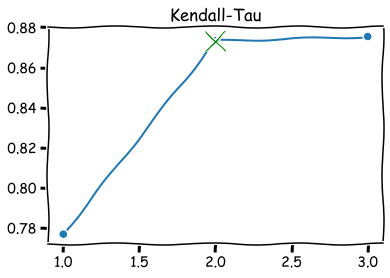

In [27]:
paths = pp.Paths.read_file('../data/US_flights_train.ngram', frequency=False)
gt = read_gt('../data/US_flights_gt.json')

mog = pp.MultiOrderModel(paths, 3)
order = mog.estimate_order()

res = validate(mog, gt)
plot_results(res, order)

This confirms what we have seen before. The predictive performance of our model saturates at the optimal order detected by our model selection algorithm. Beyond this optimal order, the **additional complexity of a third-order model is not justified by the (marginal) increase of predictive power**.

Let us now consider some real-world time-stamped social networks. To simplify our life, let us again connect to our `SQLite` database. We start by an analysis of (directed) E-Mail exchanges, stored in table `manufacturing_email`. Let us repeat our analysis from above in this data. To make the analysis faster, let us use a time-rescaling parameter of `600` (i.e. we produce 10 minute time slices). Let us further consider `delta=12`, so we consider paths within a maximum time difference of two hours.

<span style="color:red">**TODO:** Generate the same plot like above for the temporal network in the database table `manufacturing_email`.</span>

<span style="color:green">**Hints:** Use the `TemporalNetworks.filter` function to limit the training data to the first half of the obsered interactions. Use the `sample_paths_from_temporal_network_dag` function to sample `2000` root nodes. Read the ground truth from file `data/manufacturing_email_gt.json`.</span>

2022-06-13 12:15:55 [Severity.INFO]	Retrieving directed time-stamped links ...
2022-06-13 12:15:56 [Severity.INFO]	Building index data structures ...
2022-06-13 12:15:56 [Severity.INFO]	Sorting time stamps ...
2022-06-13 12:15:56 [Severity.INFO]	finished.
2022-06-13 12:15:57 [Severity.INFO]	Starting filtering ...
2022-06-13 12:16:28 [Severity.INFO]	finished. Filtered out 39724 time-stamped edges.
2022-06-13 12:16:28 [Severity.INFO]	Building index data structures ...
2022-06-13 12:16:29 [Severity.INFO]	Sorting time stamps ...
2022-06-13 12:16:29 [Severity.INFO]	finished.
2022-06-13 12:16:29 [Severity.INFO]	Constructing time-unfolded DAG ...
2022-06-13 12:16:37 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		266437
Roots:		7719
Leaves:		242490
Links:		476868
Acyclic:	None

2022-06-13 12:16:37 [Severity.INFO]	Generating causal trees for 2000 root nodes ...
2022-06-13 12:16:39 [Severity.INFO]	Analyzing tree 200/2000 ...
2022-06-13 12:16:41 [Severity.INFO]	Analyzing tree 400/2000 .

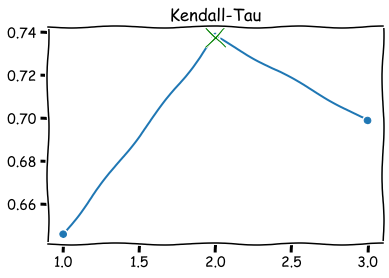

In [28]:
import sqlite3
con = sqlite3.connect('../data/temporal_networks.db')
con.row_factory = sqlite3.Row

t = pp.TemporalNetwork.from_sqlite(con.execute('SELECT source, target, time FROM manufacturing_email'),
                                   time_rescale=600)
gt = read_gt('../data/manufacturing_email_gt.json')

max_order = 3

training_data = t.filter_edges(lambda u,v,time: time<min(t.ordered_times)+0.5*t.observation_length())
paths = pp.path_extraction.sample_paths_from_temporal_network_dag(training_data, 
                                                                  delta=12, 
                                                                  max_subpath_length=max_order, 
                                                                  num_roots=2000)

mog = pp.MultiOrderModel(paths, max_order)
order = mog.estimate_order()

res = validate(mog, gt)
plot_results(res, order)

We find that the model at optimal order two yields an approx. 10-15 % increase over a first-order graph model. The model selection algorithm correctly identified that a third-order model would overfit the causal path structures, which is expressed in a drop in predictive performance.

We next study another example for a dynamic social network. We again read the first half to train our model based on the contained causal paths. This time we rescale time to 10 second intervals, and use a `delta=6` to define a maximum time difference of 60 seconds. Since this data set is generating densely connected paths, sampling `200` root nodes for the causal path calculation will already give us a seizable number of paths.

<span style="color:red">**TODO:** Repeat your analysis for the table `haggle` in the `SQLite` database, using the values mentioned above. Read the ground truth from the file `data/haggle_gt.json` and fit a multi-order model with maximum order three.</span>

In [ ]:
t = pp.TemporalNetwork.from_sqlite(con.execute('SELECT source, target, time FROM haggle'),
                                  time_rescale=10)
gt = read_gt('../data/haggle_gt.json')

max_order = 3

training_data = t.filter_edges(lambda u,v,time: time<min(t.ordered_times)+0.5*t.observation_length())
paths = pp.path_extraction.sample_paths_from_temporal_network_dag(training_data, 
                                                                  delta=6, 
                                                                  max_subpath_length=max_order, 
                                                                  num_roots=200)

mog = pp.MultiOrderModel(paths, max_order)
order = mog.estimate_order()

res = validate(mog, gt)
plot_results(res, order)

Again we observe that a higher-order PageRank calculated at the optimal order learned by our multi-order representation learning algorithm performs best in terms of prediction.

In dynamic social networks we often find that a second-order model is sufficient to explain causal paths. We attribute this to an inherent "one-step context memory" of humans, which means that depending on with whom we interacted last, we decide with whom to interact next. It is more difficult to imagine similar mechanisms that introduce higher-order correlations in a distributed way.

This is different for paths in engineered systems, which have been built to optimise paths from start to end. Here, we often observe higher-order dependencies that go beyond a second-order model. Let us study this in the final example of this session: We reconsider our data on paths in the London Tube network, extracted from Origin-Destination statistics of real passengers as explained before. Here we use a prepared training data set to save you the origin-destination path calculating, and the calculation of a training split. Let us check whether a second-order model is sufficient to explain those paths, and how this translates to prediction performance.

<span style="color:red">**TODO:** Repeat your analysis for the training paths contained in `data/tube_paths_train.ngram`. Read the ground truth from the file `data/tube_gt.json` and create a multi-order model with maximum order of four.</span>

In [ ]:
max_order = 4

paths = pp.Paths.read_file('../data/tube_paths_train.ngram', max_subpath_length=max_order)
gt = read_gt('../data/tube_gt.json')

mog = pp.MultiOrderModel(paths, max_order)
order = mog.estimate_order()

res = validate(mog, gt)
plot_results(res, order)

This plot is interesting for several reasons: 

1. It first shows that it is a bad idea to study the London Tube topology using standard graph mining and network analysis. The paths that are relevant in this system are very different from the assumption of *transitive and Markovian* paths, which we make when we apply standard centrality measures, spectral methods, random walk based measures, clustering algorithms, etc. So, a graph representation of this system is misleading, as its topology is not enough to understand higher-order dependencies in paths!
2. While a second-order model is better, it is still not enough to explain the complex path statistics of passengers. We see that all of the four model layers that we tested are significant. This is an example where we need higher-order network analytics beyonds a second-order model.
3. You may spot the `pathpy` warning in the output above. This is because `pathpy` realised that (i) the maximum tested order of four was significant, and (ii) the data contained paths that would allow to construct a model of order five. The warning highlights that there may still be higher-order dependencies in the data, that we cannot rule out based on our test.
4. If we were to use more data (and time) and test up to higher maximum orders, we find that the optimal maximum order of a multi-order model is six. For time constraints, here we did not use enough of the data to show that this yields the best prediction. Please refer to [this paper](http://dl.acm.org/citation.cfm?id=3098145) to see result of the full analysis.

This concludes our hands-on tutorial on higher-order network analytics and we now move to an open-ended data exploration.